# Teste de Cientista de Dados
Configurações do teste primeiro

---

### Entendendo os Dados
Primeiro, vamos analisar os formatos que temos e informações principais de cada tabela. Sabendo de temos valores nulos e tendo uma noção das colunas com seus respectivos tipos.

In [ ]:
# CONFIG
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

engine = create_engine('sqlite:///dsci_test.sqlite')

#### Tabela Itens
Ententendo cada tabela por vez, começando com a tabela de Itens.

In [ ]:
df_itens = pd.read_sql('select * from itens', engine)

df_itens.head()

Entendendo melhor agora o tamanho do Dataframe, colunas, se apresenta algum valor nulo e outros:

In [ ]:
df_itens.info()

Por fim, avaliando o básico de estatística nas colunas numéricas:

In [ ]:
df_itens.describe()

#### Tabela Pedidos
Ententendo agora a tabela de pedidos, vendo o DF em partes, depois pensando nos detalhes por coluna e vendo o básico estatístico de colunas numéricas.

In [ ]:
df_orders = pd.read_sql('select * from pedidos limit 100', engine)
df_orders.head()

In [ ]:
df_orders.info()

In [ ]:
df_orders.describe()

#### Tabela Transações
Ententendo um pouco mais agora da tabela de transacoes.

In [ ]:
df_transactions = pd.read_sql('select * from transacoes limit 100', engine)
df_transactions.head()

In [ ]:
df_transactions.info()

In [ ]:
df_transactions.describe()

---

## Etapa 1: Análise Exploratória 
Agora, entendendo os dados e tirando insights.

Tendo em vista que as tabelas são pequenas (no máx. 450kb), vou juntar todas em um dataframe só para ficar mais fácil de analisar todas as informações.

In [ ]:
# # TRANSFORMANDO AS COLUNS DE JOIN EM STRING ESPECÍFICOS
# df_transactions['id_pedido_mask'] = df_transactions['id_pedido_mask'].str.strip()
# df_orders['id_pedido_mask'] = df_orders['id_pedido_mask'].str.strip()

# # # df_transactions['codigo_produto_mask'] = df_transactions['codigo_produto_mask'].str.encode('utf-8')
# # # df_itens['codigo_produto_mask'] = df_orders['codigo_produto_mask'].str.encode('utf-8')

# # df_orders['id_pedido_mask'].head(100)

# # df = df_transactions.join(df_itens, on='codigo_produto_mask', how='left')
# # df = df_transactions.join(df_orders, lsuffix='id_pedido_mask', rsuffix='')
# df = df_transactions.merge(df_orders, on=['id_pedido_mask'], how='right')
# # df = df.join(df_orders, on='id_pedido_mask')

# df.head(100)

In [166]:
df = pd.read_sql('''SELECT 
	  transacoes.id_pedido_mask
	, transacoes.codigo_produto_mask
	, transacoes.id_usuario_mask
	, transacoes.brinde
	, transacoes.desconto
	, transacoes.frete
	, transacoes.quantidade
	, transacoes.receita
	, itens.familia
	, itens.peso_unitario
	, itens.setor
	, itens.subfamilia
	, pedidos.canal_marketing
	, pedidos.canal_venda
	, pedidos.contagempedidos
	, pedidos.forma_pagamento
	, pedidos.parcelas
	, pedidos.pedido_assinatura
	, pedidos.subcanal_venda
FROM transacoes transacoes
LEFT JOIN itens itens 
	ON transacoes.codigo_produto_mask = itens.codigo_produto_mask
LEFT JOIN pedidos pedidos
	ON transacoes.id_pedido_mask = pedidos.id_pedido_mask
GROUP BY 
	  transacoes.id_pedido_mask
	, transacoes.codigo_produto_mask
	, transacoes.id_usuario_mask
	, transacoes.brinde
	, transacoes.desconto
	, transacoes.frete
	, transacoes.quantidade
	, transacoes.receita
	, itens.familia
	, itens.peso_unitario
	, itens.setor
	, itens.subfamilia
	, pedidos.canal_marketing
	, pedidos.canal_venda
	, pedidos.contagempedidos
	, pedidos.forma_pagamento
	, pedidos.parcelas
	, pedidos.pedido_assinatura
	, pedidos.subcanal_venda
	''', engine)

df.head()

,id_pedido_mask,codigo_produto_mask,id_usuario_mask,brinde,desconto,frete,quantidade,receita,familia,peso_unitario,setor,subfamilia,canal_marketing,canal_venda,contagempedidos,forma_pagamento,parcelas,pedido_assinatura,subcanal_venda
0,0000b0f8dd3cc7c5058fb8307a252227,a14be9847bb8f688c740c1f048524713,a1aa3c5157fbb01ccd7960415e971fe4,0,0.00,0.0,1,110.90,Cachorros,16.800,Alimentos,Ração Seca,9db6d32a7901332471c3d304cf0a9a58,15bbb9d0bbf25e8d2978de1168c749dc,18,Cartão de Crédito Total,3,0,b2c79ad7dcf03ba266dc0885e1266675
1,0000b0f8dd3cc7c5058fb8307a252227,ca224057b4d75afbf4058891a259927b,a1aa3c5157fbb01ccd7960415e971fe4,0,0.00,0.0,2,16.84,Cachorros,0.010,Medicina e Bem Estar,Vermífugos,9db6d32a7901332471c3d304cf0a9a58,15bbb9d0bbf25e8d2978de1168c749dc,18,Cartão de Crédito Total,3,0,b2c79ad7dcf03ba266dc0885e1266675
2,0005dc868fdc729a89aff2919c59eac3,31338c1a5e939a35dc15453d7e4945ac,8e6e06a58f303366beafb4b5ad924118,0,11.99,0.0,1,107.91,Cachorros,0.235,Acessórios,Acessórios para Carros,decc1eab6d0751fcb2d8e41a2ffeb55a,a564de63c2d0da68cf47586ee05984d7,35,Cartão de Crédito Total,3,1,6ab241effd5d8dd6ecdd79cba1ac174a
3,0005dc868fdc729a89aff2919c59eac3,387f68acc1a60738763e8680718672ff,8e6e06a58f303366beafb4b5ad924118,0,19.16,0.0,4,172.44,Gatos,12.550,Higiene e Beleza,Areias e Granulados,decc1eab6d0751fcb2d8e41a2ffeb55a,a564de63c2d0da68cf47586ee05984d7,35,Cartão de Crédito Total,3,1,6ab241effd5d8dd6ecdd79cba1ac174a
4,0005dc868fdc729a89aff2919c59eac3,70df5caad67925aa6085ae92936426f5,8e6e06a58f303366beafb4b5ad924118,0,11.69,0.0,1,105.21,Gatos,10.100,Alimentos,Ração Seca,decc1eab6d0751fcb2d8e41a2ffeb55a,a564de63c2d0da68cf47586ee05984d7,35,Cartão de Crédito Total,3,1,6ab241effd5d8dd6ecdd79cba1ac174a


Agora, entendendo a relação das colunas e seus valores.

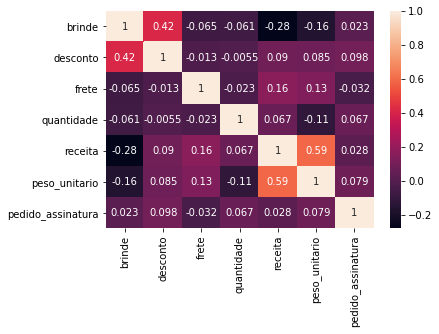

In [153]:
sn.heatmap(df.corr(), annot=True)
plt.show()

**Pontos Importantes:** <br>
    1. Olhando o principal indicador que é receita, aquela variável que mais afeta positivamente a métrica é referente ao Peso Unitário, seguido de Frete; <br>
    2. A métrica que mais afeta a receita negativamente é Brinde; <br>
    3. Existe uma forte relação positiva entre Desconto e Brinde.

Agora olhando as colunas categóricas, segue um estudo específico por Setor:

In [165]:
df_sector = pd.read_sql('''
    SELECT 
          setor
        , CAST(SUM(receita) AS decimal(10, 2)) AS receita_total
        , COUNT(DISTINCT id_usuario_mask) AS pedidos_unicos
        , CAST(SUM(receita) AS decimal(10, 2)) / COUNT(DISTINCT id_usuario_mask) AS ticket_medio
		, CAST(SUM(desconto) AS decimal(10, 2)) / COUNT(DISTINCT id_usuario_mask)  AS desconto_por_pedido
    FROM (
    SELECT 
        transacoes.id_pedido_mask
        , transacoes.codigo_produto_mask
        , transacoes.id_usuario_mask
        , transacoes.brinde
        , transacoes.desconto
        , transacoes.frete
        , transacoes.quantidade
        , transacoes.receita
        , itens.familia
        , itens.peso_unitario
        , itens.setor
        , itens.subfamilia
        , pedidos.canal_marketing
        , pedidos.canal_venda
        , pedidos.contagempedidos
        , pedidos.forma_pagamento
        , pedidos.parcelas
        , pedidos.pedido_assinatura
        , pedidos.subcanal_venda
    FROM transacoes transacoes
    LEFT JOIN pedidos pedidos
        ON transacoes.id_pedido_mask = pedidos.id_pedido_mask
    LEFT JOIN itens itens 
        ON transacoes.codigo_produto_mask = itens.codigo_produto_mask
    GROUP BY 
        transacoes.id_pedido_mask
        , transacoes.codigo_produto_mask
        , transacoes.id_usuario_mask
        , transacoes.brinde
        , transacoes.desconto
        , transacoes.frete
        , transacoes.quantidade
        , transacoes.receita
        , itens.familia
        , itens.peso_unitario
        , itens.setor
        , itens.subfamilia
        , pedidos.canal_marketing
        , pedidos.canal_venda
        , pedidos.contagempedidos
        , pedidos.forma_pagamento
        , pedidos.parcelas
        , pedidos.pedido_assinatura
        , pedidos.subcanal_venda
    )
    GROUP BY setor
    ORDER BY receita_total DESC
	''', engine)

df_sector.style.background_gradient(cmap='Purples')

,receita_total,pedidos_unicos,ticket_medio,desconto_por_pedido,setor
0,8.4395e+06,31551,267.488,24.7045,Alimentos
1,1.8621e+06,12298,151.415,11.9093,Medicina e Bem Estar
2,1.7459e+06,17375,100.483,9.32937,Higiene e Beleza
3,699514,6262,111.708,7.4843,Acessórios
4,339136,5426,62.502,4.27853,Brinquedos
5,49692.7,1583,31.3914,5.9679,Private Label
6,29327.8,14606,2.00793,63.0363,Não Vendável
7,1129.45,35,32.27,1.97114,Ac. Pet Lovers


Algumas observações importantes:
    1. Os setores que trouxeram mais Receita Total e com maior Ticket Médio foram Alimentos com Medicina e Bem Estar. 
    2. Apesar de não ter tido uma venda expressiva, os itens Não Vendável apareceram em 14 mil pedidos únicos, ficando em terceiro lugar do setor que mais aparece em pedidos;
    3. Outros pontos importantes do Não Vendável é que apesar de frequente nos pedidos, ele tem um baixíssimo ticket médio (o mais baixo de todos os setores), além de ter o maior Desconto por Pedido de qualquer outro setor!

Agora teremos as mesmas coluna para avaliar os **canais de venda**:

(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000.]),
 <a list of 7 Text major ticklabel objects>)

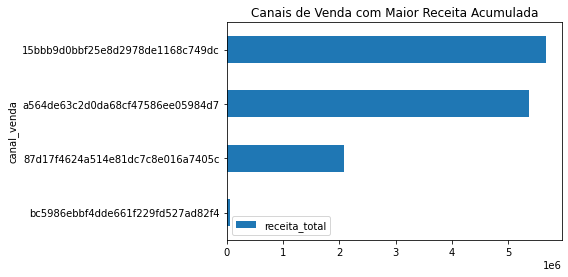

In [181]:
df_sales = pd.read_sql('''
    SELECT 
          canal_venda
		, CAST(SUM(receita) AS decimal(10, 2)) AS receita_total
    FROM (
    SELECT 
        transacoes.id_pedido_mask
        , transacoes.codigo_produto_mask
        , transacoes.id_usuario_mask
        , transacoes.brinde
        , transacoes.desconto
        , transacoes.frete
        , transacoes.quantidade
        , transacoes.receita
        , itens.familia
        , itens.peso_unitario
        , itens.setor
        , itens.subfamilia
        , pedidos.canal_marketing
        , pedidos.canal_venda
        , pedidos.contagempedidos
        , pedidos.forma_pagamento
        , pedidos.parcelas
        , pedidos.pedido_assinatura
        , pedidos.subcanal_venda
    FROM transacoes transacoes
    LEFT JOIN pedidos pedidos
        ON transacoes.id_pedido_mask = pedidos.id_pedido_mask
    LEFT JOIN itens itens 
        ON transacoes.codigo_produto_mask = itens.codigo_produto_mask
    GROUP BY 
        transacoes.id_pedido_mask
        , transacoes.codigo_produto_mask
        , transacoes.id_usuario_mask
        , transacoes.brinde
        , transacoes.desconto
        , transacoes.frete
        , transacoes.quantidade
        , transacoes.receita
        , itens.familia
        , itens.peso_unitario
        , itens.setor
        , itens.subfamilia
        , pedidos.canal_marketing
        , pedidos.canal_venda
        , pedidos.contagempedidos
        , pedidos.forma_pagamento
        , pedidos.parcelas
        , pedidos.pedido_assinatura
        , pedidos.subcanal_venda
    )
    GROUP BY canal_venda
    ORDER BY receita_total DESC
	''', engine)

df_sales = df_sales[['receita_total', 'canal_venda']].set_index('canal_venda')
df_sales = df_sales[0:4].sort_values(by = "receita_total", ascending = True)

df_sales.plot.barh()
plt.title("Canais de Venda com Maior Receita Acumulada")
plt.xticks(rotation=0)

Outros pontos importantes: <br>
1. Os dois canais de venda estão empatados em receita totais; <br>
1. Mas os dois principais representam quase 85% de toda a receita dos pedidos.

## Etapa 2: Entendimento das alavancas de receita